# Laboratorio de regresión - 4

|                |   |
:----------------|---|
| **Nombre**     |Sofia Anaya Palafox  |
| **Fecha**      |9 feb 2026   |
| **Expediente** |738594   |

## Modelos penalizados

Hasta ahora la función de costo que usamos para decidir qué tan bueno es nuestro modelo al momento de ajustar es:

$$ \text{RSS} = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \hat{y_i})^2 $$

Dado que los errores obtenidos son una combinación de sesgo y varianza, puede ser que se sesgue un parámetro para minimizar el error. Esto significa que el modelo puede decidir que la salida no sea una combinación de los factores, sino una fuerte predilección sobre uno de los factores solamente.

E.g. se quiere ajustar un modelo

$$ \hat{z} = \hat{\beta_0} + \hat{\beta_1} x + \hat{\beta_2} y $$

Se ajusta el modelo y se decide que la mejor decisión es $\hat{\beta_1} = 10000$ y $\hat{\beta_2}=50$. Considera limitaciones de problemas reales:
- Quizás los parámetros son ajustes de maquinaria que se deben realizar para conseguir el mejor producto posible, y que $10000$ sea imposible de asignar.
- Quizás los datos actuales están sesgados y sólo hacen parecer que uno de los factores importa más que el otro.

Una de las formas en las que se puede mitigar este problema es penalizando a los parámetros del modelo, cambiando la función de costo:

$$ \text{RSS}_{L2} = \sum_{i=1}^n e_i^2  + \lambda \sum_{j=1}^p \hat{\beta_j}^2 $$

El *L2* significa que se está agregando una penalización de segundo orden. Lo que hace esta penalización es que los factores ahora sólo tendrán permitido crecer si hay una reducción al menos proporcional en el error (sacrificamos sesgo, pero reducimos la varianza).

Asimismo, existe la penalización *L1*

$$ \text{RSS}_{L1} = \sum_{i=1}^n e_i^2  + \lambda \sum_{j=1}^p |\hat{\beta_j}| $$

A las penalizaciones *L2* y *L1* se les conoce también como Ridge y Lasso, respectivamente.

Para realizar una regresión con penalización de Ridge o de Lasso usamos el objeto `Ridge(alpha=?)` o `Lasso(alpha=?)` en lugar de `LinearRegression()` de `sklearn`.

Utiliza el dataset de publicidad (Advertising.csv) y realiza 3 regresiones múltiples:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

1. Sin penalización
2. Con penalización L2
3. Con penalización L1

¿Qué puedes observar al ajustar los valores de `alpha`?

Compara los resultados de los coeficientes utilizando valores diferentes de $\alpha$ y los $R^2$ resultantes.



In [3]:
import pandas as pd

df = pd.read_csv('/content/Advertising.csv')

print("First 5 rows of the dataset:")
display(df.head())

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

print("\nFeatures (X) and Target (y) prepared.")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

First 5 rows of the dataset:


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9



Features (X) and Target (y) prepared.
X shape: (200, 3)
y shape: (200,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

print("First 5 rows of scaled features:")
display(X_scaled.head())

print("\nStatistics of scaled features (Mean should be ~0, Std should be 1):")
display(X_scaled.describe().loc[['mean', 'std']])

First 5 rows of scaled features:


,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802



Statistics of scaled features (Mean should be ~0, Std should be 1):


,TV,radio,newspaper
mean,1.221245e-16,-4.529710e-16,2.220446e-16
std,1.002509e+00,1.002509e+00,1.002509e+00


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_lr = LinearRegression()

model_lr.fit(X_scaled, y)

baseline_intercept = model_lr.intercept_
baseline_coefs = model_lr.coef_
baseline_r2 = model_lr.score(X_scaled, y)

print("--- Linear Regression (No Penalty) Baseline ---")
print(f"Intercept: {baseline_intercept:.4f}")
print(f"Coefficients:")
for feature, coef in zip(X_scaled.columns, baseline_coefs):
    print(f"  {feature}: {coef:.4f}")

print(f"\nR^2 Score: {baseline_r2:.4f}")

--- Linear Regression (No Penalty) Baseline ---
Intercept: 14.0225
Coefficients:
  TV: 3.9193
  radio: 2.7921
  newspaper: -0.0225

R^2 Score: 0.8972


In [8]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso

alphas = np.logspace(-2, 4, 100)

ridge_coefs = []
lasso_coefs = []
ridge_r2 = []
lasso_r2 = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_scaled, y)
    ridge_coefs.append(ridge.coef_)
    ridge_r2.append(ridge.score(X_scaled, y))

    lasso = Lasso(alpha=a)
    lasso.fit(X_scaled, y)
    lasso_coefs.append(lasso.coef_)
    lasso_r2.append(lasso.score(X_scaled, y))

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

print(f" {alphas[0]} to {alphas[-1]}.")


 0.01 to 10000.0.
Results stored in ridge_coefs, lasso_coefs, ridge_r2, and lasso_r2.


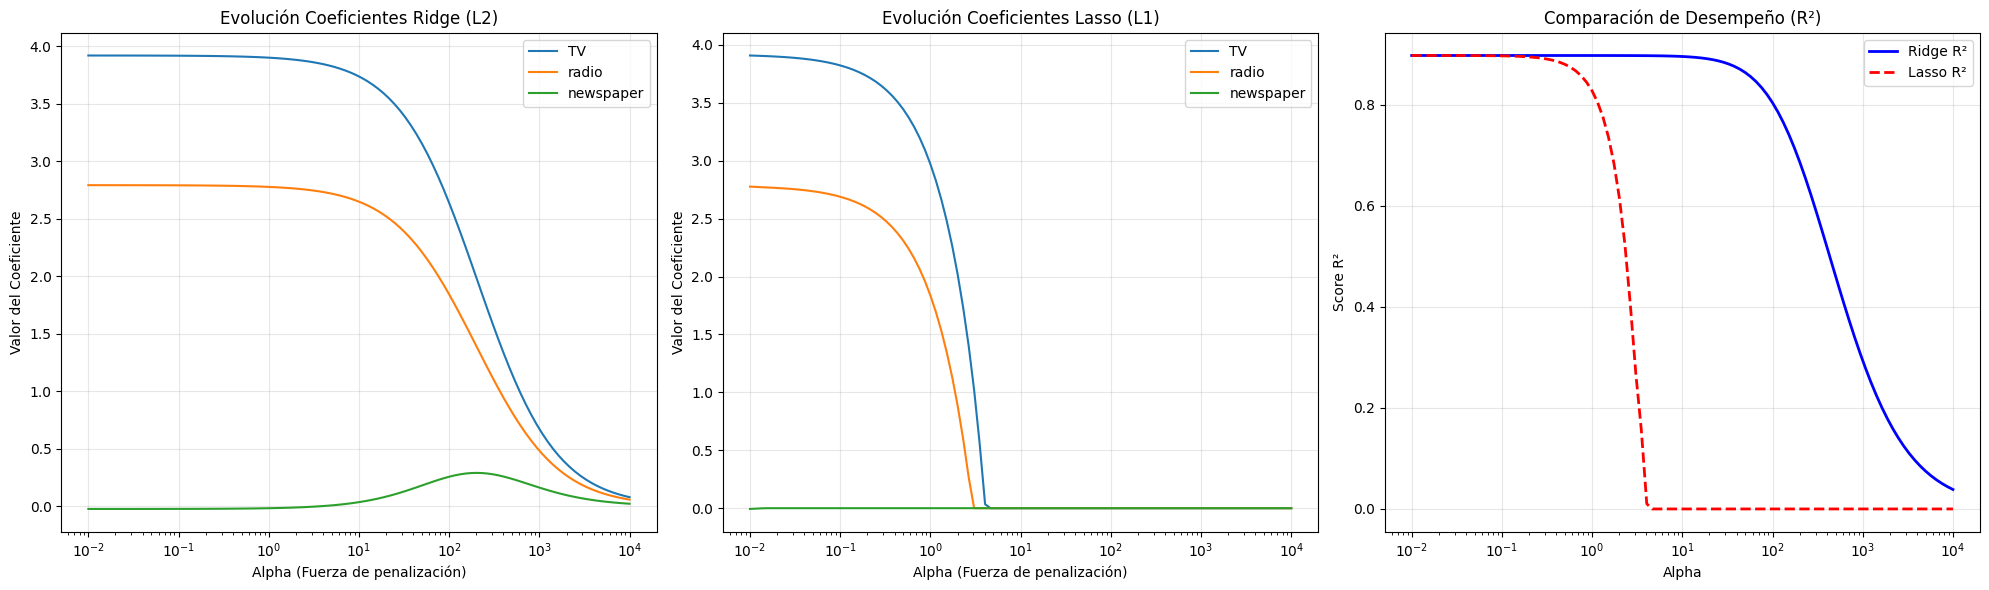

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

ax1.plot(alphas, ridge_coefs)
ax1.set_xscale('log')
ax1.set_xlabel('Alpha (Fuerza de penalización)')
ax1.set_ylabel('Valor del Coeficiente')
ax1.set_title('Evolución Coeficientes Ridge (L2)')
ax1.legend(X_scaled.columns)
ax1.grid(True, alpha=0.3)

ax2.plot(alphas, lasso_coefs)
ax2.set_xscale('log')
ax2.set_xlabel('Alpha (Fuerza de penalización)')
ax2.set_ylabel('Valor del Coeficiente')
ax2.set_title('Evolución Coeficientes Lasso (L1)')
ax2.legend(X_scaled.columns)
ax2.grid(True, alpha=0.3)

ax3.plot(alphas, ridge_r2, label='Ridge R²', color='blue', linewidth=2)
ax3.plot(alphas, lasso_r2, label='Lasso R²', color='red', linestyle='--', linewidth=2)
ax3.set_xscale('log')
ax3.set_xlabel('Alpha')
ax3.set_ylabel('Score R²')
ax3.set_title('Comparación de Desempeño (R²)')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()